# Exploring Weather Trends 

## Student - Khusniddin Fakhritdinov
### date: 4 Oct. 2020

In this project I will explore the global weather trends and weather trends in Tashkent (Uzbkeistan).
For extracting the data - I will use SQL, and Python for visualizing the data. 

First step is extracting the data. The following codes are used to extract the data:

Global data:
SELECT * FROM global_data

Data for Tashkent city:
SELECT * FROM city_data WHERE city = 'Tashkent'

Now, when I have the data, I will start importing the data into Python. 

First of all, I need to import the neccessary modules in Python. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Next, reading the data and writing it into two dataframes:

In [2]:
tashkent_data = pd.read_csv('results_tashkent.csv')
world_data = pd.read_csv('results_global.csv')

Now, let's see how does our data look like:

In [3]:
tashkent_data.head()
#This dataset has data starting from 1832 

,year,city,country,avg_temp
0,1832,Tashkent,Uzbekistan,9.48
1,1833,Tashkent,Uzbekistan,9.93
2,1834,Tashkent,Uzbekistan,9.95
3,1835,Tashkent,Uzbekistan,9.15
4,1836,Tashkent,Uzbekistan,9.65


In [4]:
world_data.head()
#and global dataset has the data starting from 1750

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


As we can see from above two tables, dataframe for Tashkent has more columns than dataframe for global data. And also we can see that the only columns we need are 'year' and 'avg_temp' columns from both dataframes. 

Now we take columns 'year' and 'avg_temp' from both dataframes, and write them into numpy arrays. 

In [5]:
#convert the data into numpy array 
years_tash = np.array(tashkent_data['year'])
avg_tash = np.array(tashkent_data['avg_temp'])
years_glob = np.array(world_data['year'])
avg_glob = np.array(world_data['avg_temp'])

Let's check the starting and ending years of observations for both Tashkent and global data:

In [6]:
print('Starting year of observations for Tashkent:', years_tash.min())
print('Ending year of observations for Tashkent:', years_tash.max())

print('Starting year of global observations:', years_glob.min())
print('Ending year of global observations:', years_glob.max())

Starting year of observations for Tashkent: 1832
Ending year of observations for Tashkent: 2013
Starting year of global observations: 1750
Ending year of global observations: 2015


And, let's check the plot for raw data:

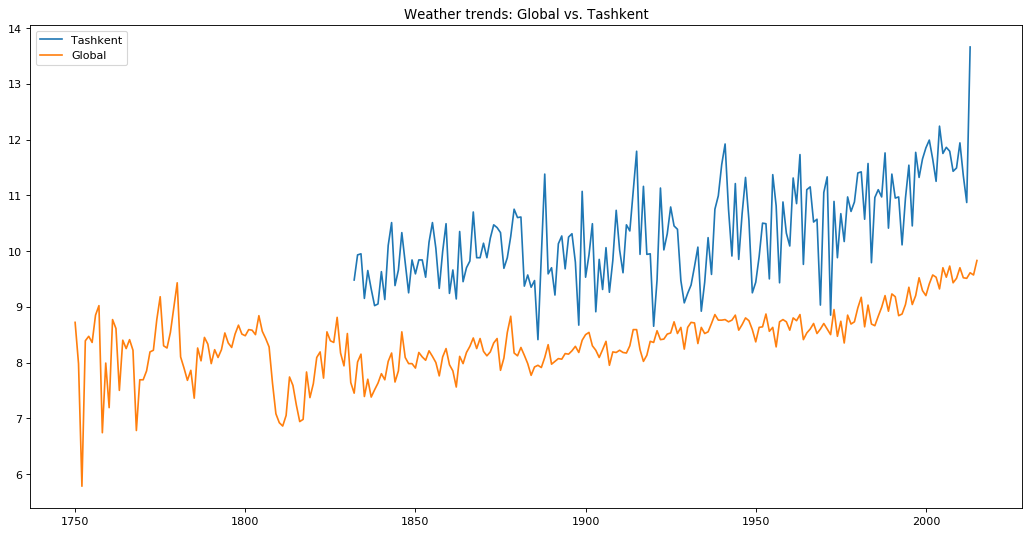

In [7]:
# plot the data
raw_fig = plt.figure(figsize=(16, 8), dpi=80)
rf = raw_fig.add_subplot(1, 1, 1)
rf.plot(years_tash, avg_tash, color='tab:blue', label='Tashkent')
rf.plot(years_glob, avg_glob, color='tab:orange', label='Global')
rf.legend()
rf.set_title('Weather trends: Global vs. Tashkent')
plt.show()

In the figure above we can see the raw plot. And data needs some preprocessing. 

As we can see, two datasets have two different starting and ending points. 
In order to make comparison of two datasets more relevant I will cut the global dataset. 

In [8]:
len_tash = len(years_tash)
len_glob = len(years_glob)

#first let's cut the ending of the global dataset
years_glob = years_glob[:len_glob - 2]
avg_glob = avg_glob[:len_glob - 2]

#now let's cut the beginning of the global dataset 
years_glob = years_glob[len_glob - len_tash : len_glob]
avg_glob = avg_glob[len_glob - len_tash : len_glob]

Now, let's plot the "raw plot" one more time, this time the starting and ending points of two datasets are the same:

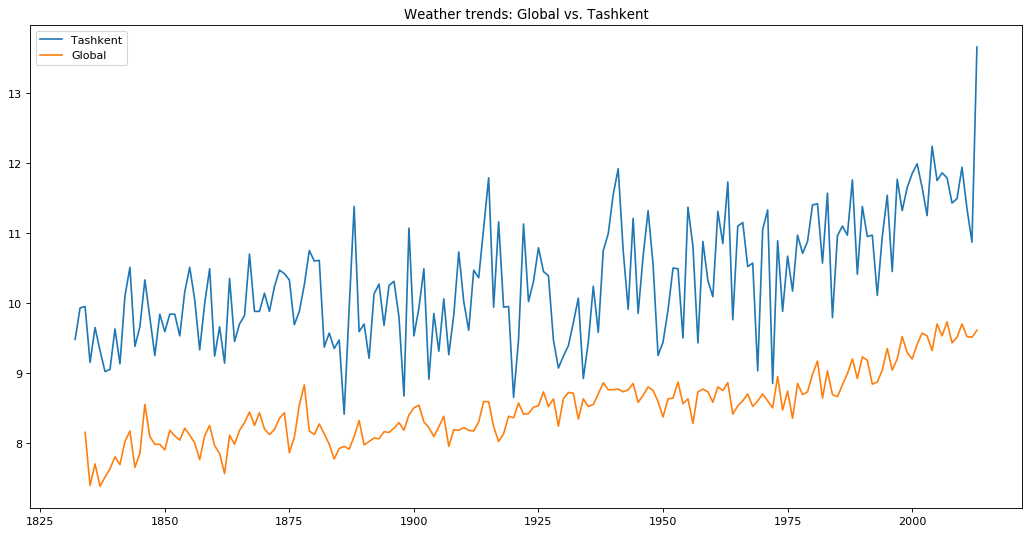

In [9]:
#now lets plot the above figure one more time
raw_fig2 = plt.figure(figsize=(16, 8), dpi=80)
rf2 = raw_fig2.add_subplot(1, 1, 1)
rf2.plot(years_tash, avg_tash, color='tab:blue', label='Tashkent')
rf2.plot(years_glob, avg_glob, color='tab:orange', label='Global')
rf2.legend()
rf2.set_title('Weather trends: Global vs. Tashkent')
plt.show()

Now in order to remove fluctuations and smooth out data, and in order to be able to see long term trends, I will try apply 4 year moving averages (MA)

In [10]:
#applying 4 year moving averages (MA)

#set the MA flag to 4 years:
maf = 4

#initiate MA averaged arrays for avg_temps:
ma_avg_tash = np.array([])
ma_avg_glob = np.array([])

#iterate through the avg_temps both for tashkent and global, and take MA for 4 years:
for i in range(len(avg_tash)):
    if i < maf:
        continue
    ma_t = (avg_tash[i] + avg_tash[i - 1] + avg_tash[i - 2] + avg_tash[i - 3]) / maf
    ma_avg_tash = np.append(ma_avg_tash, ma_t)
    
for i in range(len(avg_glob)):
    if i < maf:
        continue
    ma_g = (avg_glob[i] + avg_glob[i - 1] + avg_glob[i - 2] + avg_glob[i - 3]) / maf
    ma_avg_glob = np.append(ma_avg_glob, ma_g)


Now, let's see the result:

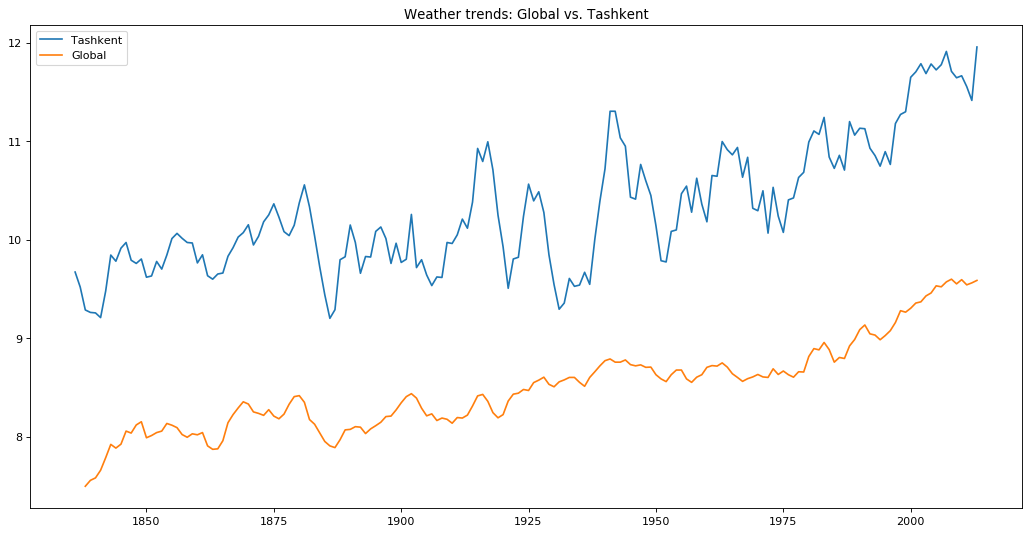

In [11]:
#now let's see the result:
raw_fig3 = plt.figure(figsize=(16, 8), dpi=80)
rf3 = raw_fig3.add_subplot(1, 1, 1)
rf3.plot(years_tash[maf:], ma_avg_tash, color='tab:blue', label = 'Tashkent')
rf3.plot(years_glob[maf:], ma_avg_glob, color='tab:orange', label = 'Global')
rf3.legend()
rf3.set_title('Weather trends: Global vs. Tashkent')

plt.show()


### Several observations from figures above:

1. Average temperature for Tashkent tends to fluctuate much more than global average temperatures.
2. Yearly average temperature for the whole period of observations was higher for Tashkent comparing with global average temperature. 
3. From the figure above it can be seen that both for global average temperature and average temperature for Tashkent shows the trend towards increasing the yearly average temperature. 
4. The average temperature of Tashkent tends to increase faster than the global average temperature